/Users/bill/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,770 (295.98 KB)

 Trainable params: 75,770 (295.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.1160 - val_loss: 0.0831
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0041 - val_loss: 0.0073
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0038 - val_loss: 0.0063
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0037 - val_loss: 0.0064
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0036 - val_loss: 0.0056
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0030 - val_loss: 0.0060
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0030 - val_loss: 0.0054
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0

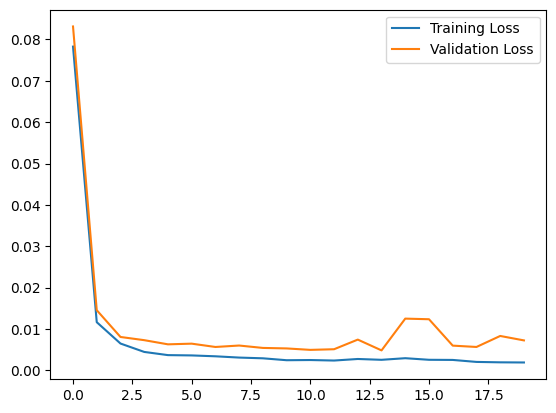

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
                  Open        High         Low       Close
2024-12-13  129.569595  132.515060  127.423965  128.454498
2024-12-14  129.269989  131.500595  128.003052  128.810120
2024-12-15  128.585205  131.820221  126.760216  128.722519
2024-12-16  129.535324  134.989319  124.038002  129.441940
2024-12-17  131.804474  133.387436  125.942245  127.799294


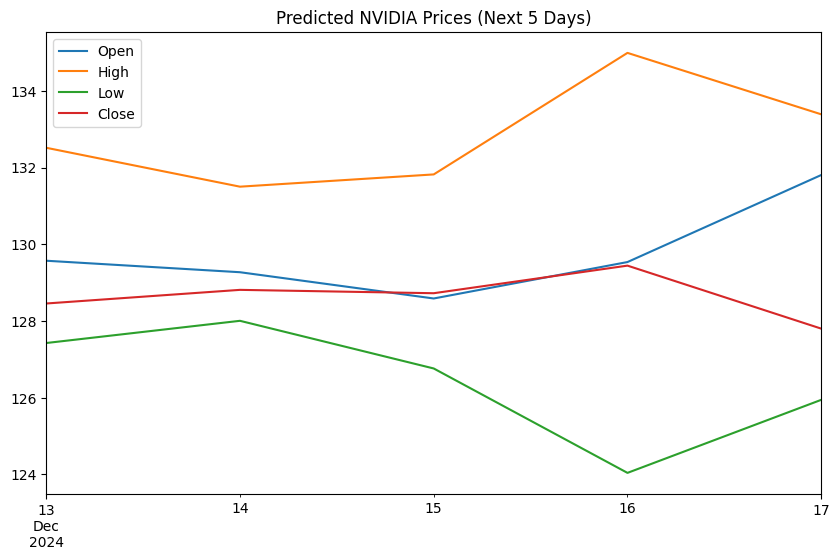

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data[['Open', 'High', 'Low', 'Close']]

# Fetch data
start_date = "2023-01-01"
end_date = "2024-12-13"
data = fetch_stock_data("NVDA", start_date, end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare training and target sets for LSTM
def prepare_data(data, n_past, n_future):
    X, y = [], []
    for i in range(n_past, len(data) - n_future + 1):
        X.append(data[i - n_past:i, :])  
        y.append(data[i:i + n_future, :]) 
    return np.array(X), np.array(y)

n_past = 30  # Use the past 30 days
n_future = 5  # Predict the next 5 days
X, y = prepare_data(scaled_data, n_past, n_future)

# Split into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(n_past, X.shape[2])),
    Dropout(0.1),
    LSTM(50, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='tanh'),
    Dense(n_future * 4) 
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train.reshape(y_train.shape[0], -1), epochs=20, batch_size=32, validation_data=(X_test, y_test.reshape(y_test.shape[0], -1)))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
def predict_future(data, model, n_past, n_future, scaler):
    last_n_days = data[-n_past:]
    input_data = np.expand_dims(last_n_days, axis=0)
    prediction = model.predict(input_data)
    prediction = prediction.reshape(n_future, 4)  # Reshape to 5x4
    return scaler.inverse_transform(prediction)

# Predict the next 5 days
scaled_data_for_prediction = scaled_data[-n_past:]
predicted_prices = predict_future(scaled_data_for_prediction, model, n_past, n_future, scaler)

# Create a DataFrame for predicted prices
predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close'])
predicted_df.index = pd.date_range(start=end_date, periods=n_future)
print(predicted_df)

# Save the model and predictions
model.save("nvda_lstm_model.keras")
predicted_df.to_csv("predicted_nvda_prices.csv")

# Plot predictions
predicted_df.plot(title="Predicted NVIDIA Prices (Next 5 Days)", figsize=(10, 6))
plt.show()


Validation 

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from pandas.tseries.offsets import BDay

def predict_from_date(input_date, ticker="NVDA", n_past=30, n_future=5):
    input_date = pd.to_datetime(input_date)
    
    # 60 day training data
    start_date = (input_date - pd.Timedelta(days=60)).strftime('%Y-%m-%d')
    end_date = input_date.strftime('%Y-%m-%d')

    # Yahoo Finance
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    
    # Error check
    if len(data) < n_past:
        raise ValueError(f"Not enough data to get {n_past} past days. Only got {len(data)} days.")
    
    # Select the n_past days
    recent_data = data[['Open', 'High', 'Low', 'Close']].iloc[-n_past:]
    
    # Fit scalar
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_recent = scaler.fit_transform(recent_data)
    
    # Load the saved model
    model = load_model("nvda_lstm_model.keras")
    
    input_data = np.expand_dims(scaled_recent, axis=0)
    
    # Predict
    prediction = model.predict(input_data)
    prediction = prediction.reshape(n_future, 4)
    predicted_prices = scaler.inverse_transform(prediction)
    
    # Create a DataFrame
    start_pred_date = input_date + pd.offsets.BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close'], index=pred_index)
    
    return predicted_df



def actual_from_date(input_date, ticker="NVDA", n_future=5):
    input_date = pd.to_datetime(input_date)
    start_pred_date = input_date + BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    
    end_fetch_date = (pred_index[-1] + BDay(1)).strftime('%Y-%m-%d')
    start_fetch_date = pred_index[0].strftime('%Y-%m-%d')
    
    stock = yf.Ticker(ticker)
    future_data = stock.history(start=start_fetch_date, end=end_fetch_date)
    future_data = future_data[['Open', 'High', 'Low', 'Close']]
    future_data.index = future_data.index.strftime('%Y-%m-%d')
    return future_data

test_date = "2024-8-03"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)





1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
Predicted Prices:
                  Open        High         Low       Close
2024-08-05  110.846634  114.926033  107.372887  110.038788
2024-08-06  109.987236  114.339760  108.221184  109.844048
2024-08-07  109.548584  114.563820  107.816772  110.638680
2024-08-08  110.396027  114.636902  107.940865  110.591606
2024-08-09  110.687531  114.944893  108.144272  109.870834

Actual Prices:
                  Open        High         Low       Close
Date                                                      
2024-08-05   92.045783  103.394036   90.675999  100.434486
2024-08-06  103.823962  107.693367  100.534476  104.233902
2024-08-07  107.793349  108.783202   98.674762   98.894730
2024-08-08  101.984246  105.483706   97.504935  104.953789
2024-08-09  105.623688  106.583539  103.414030  104.733826
